In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,075
Trainable params: 1,075
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/24 [>.............................] - ETA: 8s - loss: 1.1037 - accuracy: 0.3984
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 1s 9ms/step - loss: 1.0946 - accuracy: 0.4967 - val_loss: 1.0639 - val_accuracy: 0.4956
Epoch 2/1000
 1/24 [>.............................] - ETA: 0s - loss: 1.0575 - accuracy: 0.5312
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 1.0491 - accuracy: 0.5282 - val_loss: 1.0288 - val_accuracy: 0.5634
Epoch 3/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.9949 - accuracy: 0.5703
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 1.0164 - accuracy: 0.5518 - val_loss: 0.9962 - val_accuracy: 0.5792
Epoch 4/1000
 1/24 [>.............................] - ETA: 0s - los

 1/24 [>.............................] - ETA: 0s - loss: 0.4300 - accuracy: 0.8516
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.8210 - val_loss: 0.4004 - val_accuracy: 0.8623
Epoch 28/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.4760 - accuracy: 0.8359
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.8256 - val_loss: 0.3926 - val_accuracy: 0.8673
Epoch 29/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.4129 - accuracy: 0.8672
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.8256 - val_loss: 0.3848 - val_accuracy: 0.8663
Epoch 30/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.46

 1/24 [>.............................] - ETA: 0s - loss: 0.3637 - accuracy: 0.8750
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8557 - val_loss: 0.3089 - val_accuracy: 0.8899
Epoch 54/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.4171 - accuracy: 0.8203
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8479 - val_loss: 0.3081 - val_accuracy: 0.8928
Epoch 55/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8906
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3781 - accuracy: 0.8584 - val_loss: 0.3071 - val_accuracy: 0.8909
Epoch 56/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.37

 1/24 [>.............................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8516
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.8639 - val_loss: 0.2834 - val_accuracy: 0.9056
Epoch 80/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3332 - accuracy: 0.8828
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.8682 - val_loss: 0.2841 - val_accuracy: 0.9036
Epoch 81/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3136 - accuracy: 0.8828
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8705 - val_loss: 0.2830 - val_accuracy: 0.9036
Epoch 82/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.36

 1/24 [>.............................] - ETA: 0s - loss: 0.3807 - accuracy: 0.8359
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8711 - val_loss: 0.2717 - val_accuracy: 0.9066
Epoch 106/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8438
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8803 - val_loss: 0.2715 - val_accuracy: 0.9066
Epoch 107/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3019 - accuracy: 0.8594
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3387 - accuracy: 0.8734 - val_loss: 0.2712 - val_accuracy: 0.9056
Epoch 108/1000
 1/24 [>.............................] - ETA: 0s - loss

 1/24 [>.............................] - ETA: 0s - loss: 0.3563 - accuracy: 0.8594
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.8689 - val_loss: 0.2661 - val_accuracy: 0.9076
Epoch 132/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3949 - accuracy: 0.8516
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8774 - val_loss: 0.2660 - val_accuracy: 0.9086
Epoch 133/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8594
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8793 - val_loss: 0.2659 - val_accuracy: 0.9066
Epoch 134/1000
 1/24 [>.............................] - ETA: 0s - loss

 1/24 [>.............................] - ETA: 0s - loss: 0.3632 - accuracy: 0.8359
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.8793 - val_loss: 0.2611 - val_accuracy: 0.9066
Epoch 158/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3935 - accuracy: 0.8672
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8744 - val_loss: 0.2608 - val_accuracy: 0.9066
Epoch 159/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.2505 - accuracy: 0.9375
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8721 - val_loss: 0.2628 - val_accuracy: 0.9066
Epoch 160/1000
 1/24 [>.............................] - ETA: 0s - loss

 1/24 [>.............................] - ETA: 0s - loss: 0.2771 - accuracy: 0.9062
Epoch 183: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8770 - val_loss: 0.2585 - val_accuracy: 0.9076
Epoch 184/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8828
Epoch 184: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.8787 - val_loss: 0.2580 - val_accuracy: 0.9076
Epoch 185/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8516
Epoch 185: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8823 - val_loss: 0.2578 - val_accuracy: 0.9076
Epoch 186/1000
 1/24 [>.............................] - ETA: 0s - loss

 1/24 [>.............................] - ETA: 0s - loss: 0.2930 - accuracy: 0.9062
Epoch 209: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8826 - val_loss: 0.2551 - val_accuracy: 0.9076
Epoch 210/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.4073 - accuracy: 0.8594
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.8872 - val_loss: 0.2547 - val_accuracy: 0.9076
Epoch 211/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.2914 - accuracy: 0.9141
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8852 - val_loss: 0.2551 - val_accuracy: 0.9076
Epoch 212/1000
 1/24 [>.............................] - ETA: 0s - loss

 1/24 [>.............................] - ETA: 0s - loss: 0.1988 - accuracy: 0.9375
Epoch 235: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8859 - val_loss: 0.2525 - val_accuracy: 0.9076
Epoch 236/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.2528 - accuracy: 0.9062
Epoch 236: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8830 - val_loss: 0.2521 - val_accuracy: 0.9076
Epoch 237/1000
 1/24 [>.............................] - ETA: 0s - loss: 0.3381 - accuracy: 0.9062
Epoch 237: saving model to model/point_history_classifier\point_history_classifier.hdf5
24/24 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8849 - val_loss: 0.2528 - val_accuracy: 0.9076
Epoch 238/1000
 1/24 [>.............................] - ETA: 0s - loss

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 64ms/step
[0.77480465 0.01290015 0.21229513]
0


# 混同行列

32/32 [==============================] - 0s 549us/step


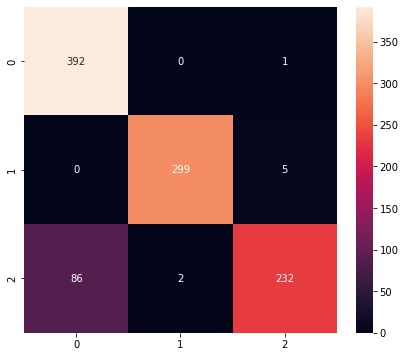

Classification Report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       393
           1       0.99      0.98      0.99       304
           2       0.97      0.72      0.83       320

    accuracy                           0.91      1017
   macro avg       0.93      0.90      0.91      1017
weighted avg       0.92      0.91      0.90      1017



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mfaja\AppData\Local\Temp\tmpkw21_00_\assets


6388

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.77480465 0.01290015 0.21229509]
0
